In [101]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import matplotlib

In [21]:
df_raw = pd.read_csv('HMEQ.csv')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [22]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [23]:
df_raw['JOB'].fillna('Other', inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [24]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 777)

In [25]:
log_model = Logit.from_formula('BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC', df_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.241434
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Fri, 03 May 2019   Pseudo R-squ.:                  0.2155
Time:                        12:10:29   Log-Likelihood:                -633.28
converged:                       True   LL-Null:                       -807.20
                                        LLR p-value:                 2.938e-64
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.5586      0.529     -8.617      0.000      -5.595      -3.522

In [26]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

3668    0
890     0
1615    0
3176    0
1619    0
dtype: int64

In [27]:
print(f"Accuracy: {accuracy_score(df_test['BAD'], y_pred_class)}")
print(f'Confusion Matrix:\n{confusion_matrix(df_test["BAD"], y_pred_class)}')

Accuracy: 0.9288888888888889
Confusion Matrix:
[[1019    3]
 [  77   26]]


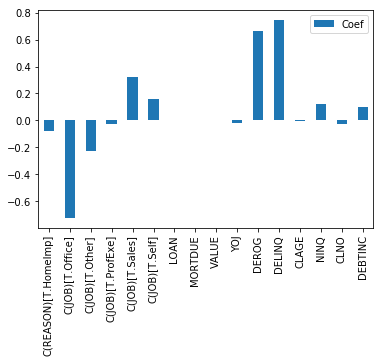

In [28]:
df_logistic_coef = pd.DataFrame({'Coef':log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.bar(y = 'Coef')

In [29]:
df_char = df_raw.select_dtypes(include = 'object')
df_numeric = df_raw.select_dtypes(exclude = 'object')

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)

df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [30]:
df_scaled['BAD'] = np.where(df_scaled['BAD']> 0, 1, 0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,HomeImp,Office


In [31]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state = 777)

In [32]:
scaled_log_model = Logit.from_formula('''
BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG + DELINQ + CLAGE + NINQ + CLNO + DEBTINC
''', df_scaled_train)
scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.241434
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Fri, 03 May 2019   Pseudo R-squ.:                  0.2155
Time:                        12:10:29   Log-Likelihood:                -633.28
converged:                       True   LL-Null:                       -807.20
                                        LLR p-value:                 2.938e-64
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.5772      0.210    -12.258      0.000      -2.989      -2.165

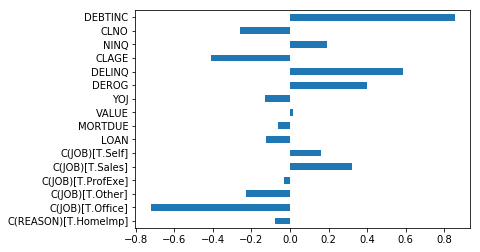

In [33]:
df_log_scaled_coef = pd.DataFrame({'Coef':scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = 'Coef', legend = False)

In [35]:
df = pd.read_csv('통신고객이탈.csv')

In [36]:
df.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [51]:
df['CHURN'] = np.where(df['CHURN'] == 'Active', 0, 1)

In [53]:
df.drop('CUSTOMER_ID', axis = 1, inplace = True)

In [55]:
df.tail()

,CHURN,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
925,1,M,19,Play 100,SOP10,Med,17.40,12,60,100.8,27,59.4,127,628.2
926,1,F,59,Play 100,SOP20,Med,17.37,15,82,130.2,12,25.8,357,650.7
927,1,F,33,Play 300,S50,Med,44.93,12,174,286.2,25,67.0,596,1039.0
928,1,F,25,Play 300,S50,Med,40.43,14,315,552.0,0,0.0,609,1188.3
929,1,F,30,Play 300,SOP10,Med,31.47,12,16,306.6,37,109.8,367,957.0


In [72]:
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 777)

In [47]:
df['HANDSET'].unique()

array(['ASAD170', 'S50', 'S80', 'ASAD90', 'BS110', 'BS210', 'WC95',
       'CAS30', 'CAS60', 'SOP10', 'SOP20'], dtype=object)

In [57]:
log_model = Logit.from_formula('''CHURN ~ C(GENDER) + AGE + C(CHARGE_TYPE) + C(HANDSET) + C(USAGE_BAND) + SERVICE_DURATION + DROPPED_CALLS + PEAK_CALLS_NO + PEAK_CALLS_TIME + WEEKEND_CALLS_NO + WEEKEND_CALLS_TIME + TOTAL_CALLS_NO + TOTAL_CALLS_TIME''', df)
log_result = log_model.fit()
print(log_result.summary())

         Current function value: 0.248891
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                  930
Model:                          Logit   Df Residuals:                      900
Method:                           MLE   Df Model:                           29
Date:                Fri, 03 May 2019   Pseudo R-squ.:                  0.4934
Time:                        14:09:09   Log-Likelihood:                -231.47
converged:                      False   LL-Null:                       -456.93
                                        LLR p-value:                 3.244e-77
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -21.9619    797.790     -0.028      0.978   -1585.602    1541.678
C(GENDER)[T.M]   

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [68]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.tail(10)

740    0
600    0
665    0
488    0
883    1
96     0
98     0
280    0
115    0
133    0
dtype: int64

In [74]:
print(f'Accuracy: {accuracy_score(df_test["CHURN"], y_pred_class)}')
print(f'Confusion Matrix: \n{confusion_matrix(df_test["CHURN"], y_pred_class)}')

Accuracy: 0.9068100358422939
Confusion Matrix: 
[[219   4]
 [ 22  34]]


# 분류 - RandomForestClassifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
parsed_df = pd.get_dummies(df)
parsed_df.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [96]:
parsed_df_y = parsed_df['CHURN']
parsed_df_x = parsed_df.drop('CHURN', axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(parsed_df_x, parsed_df_y, test_size = 0.3, random_state = 777)

In [97]:
rf_uncustomized = RandomForestClassifier(random_state = 777)
rf_uncustomized.fit(parsed_df_x, parsed_df_y)
print(f'Accuracy on training: {rf_uncustomized.score(df_train_x, df_train_y)}')
print(f'Accuracy on test: {rf_uncustomized.score(df_test_x, df_test_y)}')

Accuracy on training: 0.9969278033794163
Accuracy on test: 0.996415770609319


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [98]:
train_accuracy = list()
test_accuracy = list()
para_tree = [tree * 10 for tree in range(1, 16)]

for tree in para_tree:
    rf = RandomForestClassifier(random_state=777, n_estimators=tree)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy = pd.DataFrame()
df_accuracy['Estimator'] = para_tree
df_accuracy['TrainAccuracy'] = train_accuracy
df_accuracy['TestAccuracy'] = test_accuracy

df_accuracy.round(3)

,Estimator,TrainAccuracy,TestAccuracy
0,10,0.992,0.849
1,20,0.997,0.857
2,30,1.000,0.864
3,40,0.998,0.867
4,50,1.000,0.875
5,60,1.000,0.871
6,70,1.000,0.875
7,80,1.000,0.878
8,90,1.000,0.878
9,100,1.000,0.882


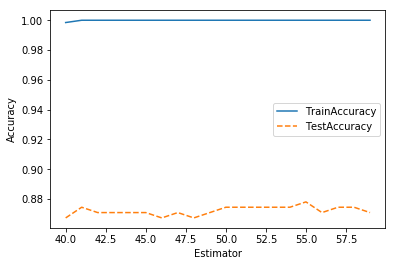

In [102]:
plt.plot(para_tree, train_accuracy, linestyle = '-', label = 'TrainAccuracy')
plt.plot(para_tree, test_accuracy, linestyle = '--', label = 'TestAccuracy')
plt.ylabel('Accuracy')
plt.xlabel('Estimator')
plt.legend()

# estimator == 41

In [ ]:
train_accuracy = list()
test_accuracy = list()
para_tree = [tree for tree in range(40, 60)]

for tree in para_tree:
    rf = RandomForestClassifier(random_state=777, n_estimators=tree)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy = pd.DataFrame()
df_accuracy['Estimator'] = para_tree
df_accuracy['TrainAccuracy'] = train_accuracy
df_accuracy['TestAccuracy'] = test_accuracy

df_accuracy.round(3)